In [3]:
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv("C:/Users/palla/Documents/Py files/datasets/top50.csv")
data.head()

#                       Track.Name    Artist.Name           Genre  \
0  1                         Señorita   Shawn Mendes    canadian pop   
1  2                            China       Anuel AA  reggaeton flow   
2  3    boyfriend (with Social House)  Ariana Grande       dance pop   
3  4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4  5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

In [16]:
#checking NA cells
data.isna().sum()

#                   0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [111]:
data['Genre'].value_counts()
#dance pop genre has the most songs in the list

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [112]:
len(data['Genre'].unique())
#Total genre present

21

New Table

In [27]:
data.columns

Index(['#', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

The Popularity graphs

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
plt.figure(figsize=(200, 50))
ax = sns.barplot(x=data['Genre'], y=data['Popularity'])

# Increase font size of values -- Google search
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points', fontsize=100)

plt.title('Genre vs Popularity', fontsize=200)
plt.xlabel('Genre', fontsize=150)
plt.ylabel('Popularity',fontsize=150)
plt.tick_params(axis='x', labelsize=100, rotation=75)  
plt.show()

In [132]:
plt.figure(figsize=(200, 50))
ax = sns.barplot(x=data['Artist.Name'], y=data['Popularity'])

# Increase font size of values -- Google search
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points', fontsize=100)

plt.title('Artist Name vs Popularity', fontsize=200)
plt.xlabel('Artist Name', fontsize=150)
plt.ylabel('Popularity',fontsize=150)
plt.tick_params(axis='x', labelsize=100, rotation=75)  
plt.show()

Heat Map

In [153]:
#Creating a new column for Loudness since the values were in negative
data['Loudness+']=-(data['Loudness..dB..'])
data['Loudness+'].unique()

array([ 6,  4,  8,  5, 11,  2,  7,  3,  9], dtype=int64)

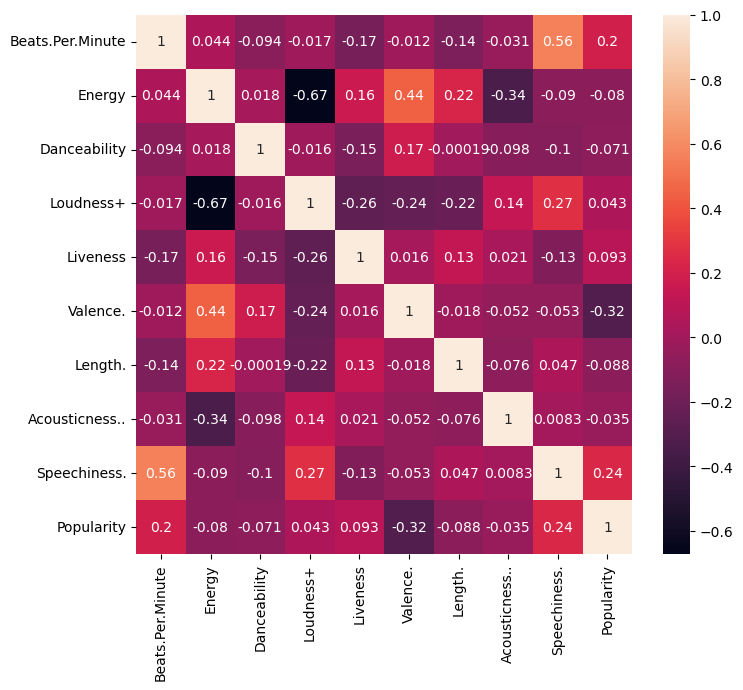

In [154]:
plt.subplots(figsize=(8, 7))
da1=data[['Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness+', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity']]
sns.heatmap(da1.corr(), annot=True)
plt.show()

Beats Per Minute greatly correlates with Speechiness